In [10]:
""" Trains an agent with (stochastic) Policy Gradients on Pong. Uses OpenAI Gym. """
import numpy as np
import pickle as pickle
import tensorflow as tf
import gym

['Episode', 'Score']
['Episode', 'Score']
['Episode', 'Score', 'Loss']
['Episode', 'Score', 'Loss']


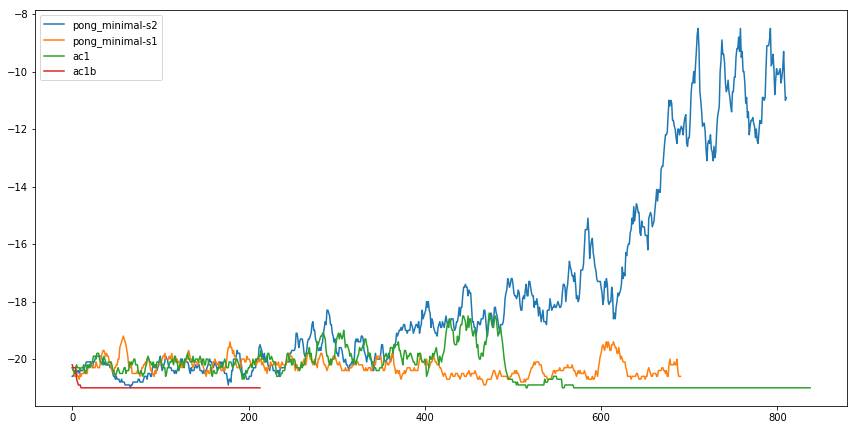

In [27]:

from logutil import visualise,quickax
%matplotlib inline

ax=quickax([32,16])
visualise(ax,'pong_minimal-s2')
visualise(ax,'pong_minimal-s1')
visualise(ax,'ac1')
visualise(ax,'ac1b')

ax.legend();
# ax.set_ylim(top = -15)

# dictdata
# print(data[0])
#             first = 0;

#         row[]
#         print(', '.join(row))
#         print(row)
#         print([x.replace('.','').replace('-','').isdigit() for x in row])
        

In [10]:
from matplotlib import pyplot as plt
import csv
import numpy as np

def readcsv(name, usedict = 0):
    with open(name, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
        first = 1;
        for row in spamreader:
            if first:
                fieldind = [i for i,x in enumerate(row) if not x.replace('.','').replace('-','').isdigit()]
    #             print(fieldind);
                header = [row[i] for i in fieldind];
    #             data = {row[i]:[] for i in fieldind};
                print(header)
                data = [[] for i in fieldind];
                first = 0;
            for i,n in enumerate(fieldind):
                data[i].append(row[n+1]);
    if usedict:
        data = {header[i]:data[i] for i,fi in enumerate(fieldind)};
    return(data)



def quickax(siz = [8,8] ):
    fig = plt.figure(figsize=siz);
    ax1 = fig.add_subplot(221)
    return ax1
LogName = 'Models/ac1.log';

winwid = 10;
movmean = lambda x,winwid:np.convolve(x,np.ones((winwid,))/winwid,'valid' );

def visualise(ax, AgentName, winwid = 10):
    LogFile = 'Models/'+AgentName+'.log';
    x = np.array(readcsv(LogFile,True)['Score']).astype('float');
    movm_x = movmean(x,winwid);
    ax.plot(movm_x, label = AgentName);

['Episode', 'Score']
['Episode', 'Score']
['Episode', 'Score', 'Loss']
['Episode', 'Score', 'Loss']


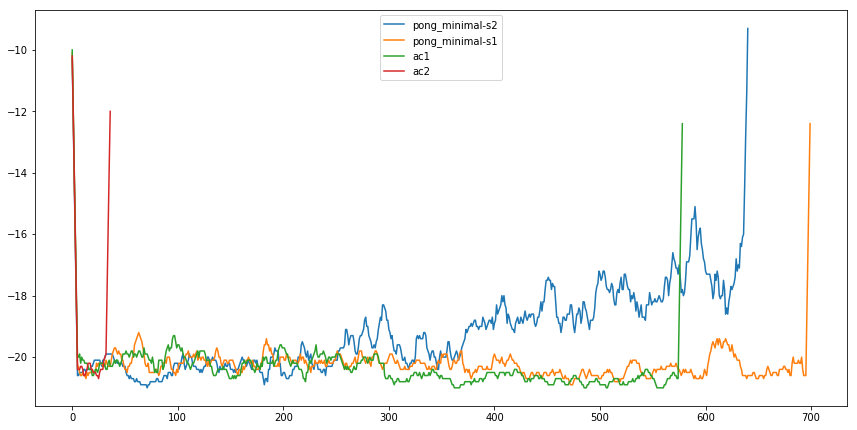

* Initiliase topology
* set input and output
* set optimiser
* set routine


In [2]:
# tf.reset_default_graph()
from keras.layers import Input, Dense, convolutional,core,concatenate,Flatten,Reshape,Concatenate
from keras.models import Model,load_model
from keras.models import model_from_json
from keras import backend as K
from PGAgent import PGAgent
import keras

def quickax():
    fig = plt.figure(figsize=[8,8])
    ax1 = fig.add_subplot(221)
    return ax1
def savemodel(m,ModelFile):
    # serialize model to JSON
    model_json = m.to_json()
    with open(ModelFile+'.json', "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(ModelFile+'.h5')
    pickle.dump(losshist,open(ModelFile+'.p', "wb"))
    print("Saved model to disk at "+ModelFile)
# savemodel(model,ModelFile)

# load json and create model
def loadmodel(ModelFile):
    global losshist,episode_number
    json_file = open(ModelFile+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(ModelFile+'.h5')
#     print("Saved model to disk at "+ModelFile)
    losshist = pickle.load(open(ModelFile+'.p', 'rb'))
    episode_number = len(losshist.losses);
    print("Model loaded from disk at "+ModelFile)
    return(loaded_model)
# model = loadmodel(ModelFile)
class LossCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
class LossHist():
    def __init__(self):
        self.losses=[];
    def add(self,n,loss):
        l = len(self.losses);
        if n == l+1:
            self.losses.append(loss);
        else:
            self.losses += [0]*(n-l);
            self.losses = self.losses[:n];
            self.losses[n-1] = loss;
            print('Loss history has changed ')
    def vis(self,ax):
        ax.plot(self.losses,'-');
        pass

def lossfunc(y_true,y_pred):
    return K.mean(K.mean( K.square( y_pred / (K.abs(y_true)+1) - 1)  )); 

def rlossfunc(truelst,y_pred):
    y_true,rsignal = truelst;
    loglik = K.log(y_true*(y_true - y_pred) + (1 - y_true)*(y_true + y_pred));
    loss = loglik * (- rsignal); 
    return K.mean(K.mean(loss)); 

# tpr=time_epr;
def decouple(tpr):
    tpr1=np.maximum(tpr,0);
    tpr2=np.minimum(tpr,0);
    tpr1[tpr1==0]=np.maximum(np.max(tpr1),20);
    tpr2[tpr2==0]=np.minimum(np.min(tpr2),-20);
    tpr2=-tpr2;
    time_epr = np.hstack([tpr1,tpr2])
    return(time_epr)


def calc_expt(eptpred,rd=np.array([[1,-1]])):
    prep = np.exp(-eptpred)
    z = np.expand_dims(np.sum(prep,axis = 1),1);
    rz = np.reciprocal(z)
#     p = prep * z,;
#     rd = np.array([[1,-1]]);
    expt = (np.sum(prep*rd,axis = 1)*rz.T).T;
    return expt



Using TensorFlow backend.


In [19]:
# xinput.shape
del model
del agent
del losshist

(0, 1.0300502315163613)

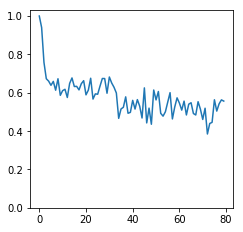

In [88]:
# losshist_temp=losshist;

ax = quickax();
losses = losshist.losses;
losshist = LossHist();
losshist.losses = losses;
losshist.vis(ax);
ax.set_ylim(bottom=0)

80

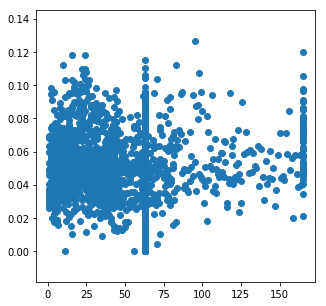

In [13]:
# discount_rewards(epdlogp)
x.size
%matplotlib inline
plt.close('all')
fig=plt.figure(figsize=[5,5])
ax1=plt.subplot()
# ax1.plot(time_epr)
# ax1.plot(discounted_epr)
ax1.scatter(abs(time_epr),eptpred)
# ax1.set_xlim([0, 200])
# ax1.set_xlim([800, 1000])
# ax1.set_ylim([-10, 000])
# ax1.imshow(eph[:500,:500].T)
time_epr.size
# tpreds.size
D1



In [10]:
agent

(1142, 1)

In [11]:
# agent.state
try:
    del PGAgent;
except: pass
x.shape

(1, 6400)

In [24]:
# discount_rewards(epdlogp)

# z=x;
# z[:,0]= np.convolve(x[:,0], [1,-2,1], mode='same')
# z[:,1]= np.convolve(x[:,1], [1,-2,1], mode='same')
# eptpred = z;
deptpred = np.copy(eptpred);
x= np.copy(eptpred);

deptpred[:,0] = np.convolve(x[:,0], [0,-1,1], mode='same');
deptpred[:,1] = np.convolve(x[:,1], [0,-1,1], mode='same');
x[:,0] = np.convolve(x[:,0], [1./3,1./3,1./3], mode='same');
x[:,1] = np.convolve(x[:,1], [1./3,1./3,1./3], mode='same');
# deptpred[:,0] = np.convolve(abs(deptpred[:,0]), [1./3,1./3,1./3], mode='same');
# deptpred[:,1] = np.convolve(abs(deptpred[:,1]), [1./3,1./3,1./3], mode='same');

# deptpred[:,1] = np.convolve(x[:,1], [0,-1,1], mode='same');



def calc_expt(eptpred,rd=np.array([[1,-1]])):
    prep = np.exp(-eptpred)
    z = np.expand_dims(np.sum(prep,axis = 1),1);
    rz = np.reciprocal(z)
#     p = prep * z,;
#     rd = np.array([[1,-1]]);
    expt = (np.sum(prep*rd,axis = 1)*rz.T).T;
    return expt


def merge_signal(epr,eptpred):
    rd = discount_rewards(epr);
    critic = calc_expt(eptpred);
    wt =np.expand_dims(np.array( [1, np.exp(-curr_loss)]),1);
    vct = np.array([epr,critic]).squeeze();
    signal = np.sum(vct*wt,axis=0)/np.sum(wt,axis=0);
    return signal 
# signal
# x

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


()

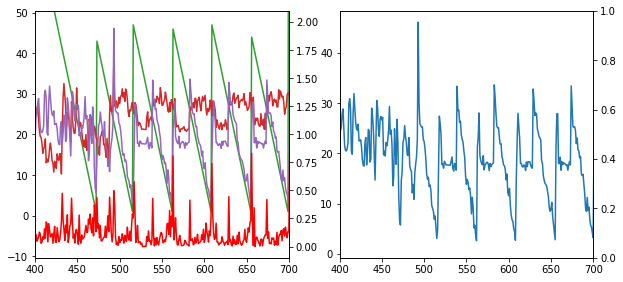

In [27]:
%matplotlib inline
plt.close('all')
fig=plt.figure(figsize=[10,10])
ax1=plt.subplot(221)

ax1.plot(losshist.losses);
ax1.plot(time_epr)
ax1b=ax1.twinx()
ax1.plot(eptpred,'-')
ax1b.plot(vari_signal(eptpred),'r')

ax2=plt.subplot(222)
ax2b=ax2.twinx();

T2P = lambda eptpred:(np.sqrt(eptpred*4+1) - 1)/(2*eptpred);
normalise = lambda aprob,axis: aprob/np.sum(aprob,axis = axis,keepdims=1);
signal_critic = np.sum( normalise( T2P(eptpred),1) * np.array([[1.,-1.]]),axis = 1, keepdims=1);
signal_critic = convolve2d(signal_critic,np.array([[-.5,.5,0]]).T,'same')
rsignal = np.mean( T2P(eptpred) * np.array([[1.,-1.]]),axis = 1, keepdims=1);

# ax2.plot(eptpred[1:,: ])
# ax2b.plot(np.diff(eptpred[:,:],axis=0,n=1)/eptpred[:-1,],'--')
ax2.plot(eptpred[:-1,1])
# ax2b.plot(vari_signal(eptpred))
# ax2b.plot(abs(deptpred[:,1])/x[:,1],'--r')
# ax2.plot(eptpred[:-1,0])
# ax2b.plot(abs(deptpred[:,0])/x[:,0],'--r')


# ax3.plot(np.sign(-(epspred-.5))*2*(eptpred-1))
# ax3.plot(discounted_epr)
# ax3.scatter(abs(time_epr),eptpred)

XLIM = [600, 850]
XLIM = np.array([1E3, 1300]) -600
ax1.set_xlim(XLIM)
# ax1.set_xlim([500,1000])
# ax1.set_xlim([800,900])
# ax1.set_xlim([1000,1100])

# ax1.set_ylim(top = 2)
ax2.set_xlim(XLIM)
ax1.set_ylim(top =50.5)

# ax2b.set_ylim(top =2.5)


# ax1.imshow(eph[:500,:500].T)
# tpreds.size
standardise = lambda rewards: (rewards - np.mean(rewards,keepdims =1)) / np.std(rewards ) ;
np.std(eptpred).shape

()

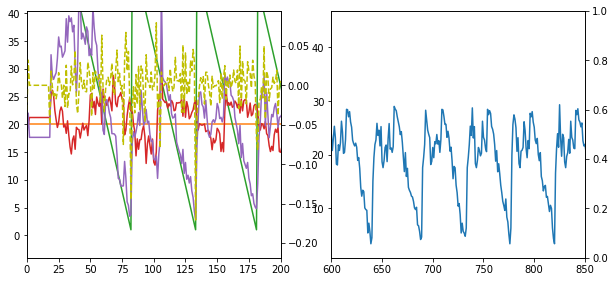

In [5]:
%matplotlib inline
plt.close('all')
fig=plt.figure(figsize=[10,10])
ax1=plt.subplot(221)

ax1.plot(losshist.losses);
ax1.plot(time_epr)
ax1b=ax1.twinx()
# ax1b.plot(rsignal,'r')


# ax1b.plot(expt)

# xcritic= np.convolve(critic, [0,-1,1], mode='same');

# ax1.plot(xcritic)

ax1.plot(eptpred,'-')
# ax1.plot(x,'-')
# def 

ax2=plt.subplot(222)
ax2b=ax2.twinx();
T2P = lambda eptpred:(np.sqrt(eptpred*4+1) - 1)/(2*eptpred);
normalise = lambda aprob,axis: aprob/np.sum(aprob,axis = axis,keepdims=1);

signal_critic = np.sum( normalise( T2P(eptpred),1) * np.array([[1.,-1.]]),axis = 1, keepdims=1);
signal_critic = convolve2d(signal_critic,np.array([[-.5,.5,0]]).T,'same')

rsignal = np.mean( T2P(eptpred) * np.array([[1.,-1.]]),axis = 1, keepdims=1);

ax1b.plot(signal_critic,'--y')
# ax2.plot(eptpred[1:,: ])
# ax2b.plot(np.diff(eptpred[:,:],axis=0,n=1)/eptpred[:-1,],'--')
# ax1.plot(eptpred[:,1])

ax2.plot(eptpred[:-1,1])
# ax2b.plot(abs(deptpred[:,1])/x[:,1],'--r')
# ax2.plot(eptpred[:-1,0])
# ax2b.plot(abs(deptpred[:,0])/x[:,0],'--r')

# ax1.plot(np.sign(-(epspred-.5))*2*(eptpred-1))

# ax1.plot(discounted_epr)
# ax1.scatter(abs(time_epr),eptpred)
ax1.set_xlim([0, 200])
# ax1.set_xlim([500,1000])
# ax1.set_xlim([800,900])
# ax1.set_xlim([1000,1100])

# ax1.set_ylim(top = 2)
ax2.set_xlim([600, 850])
ax1.set_ylim(top =40.5)

# ax2b.set_ylim(top =2.5)


# ax1.imshow(eph[:500,:500].T)
# tpreds.size
standardise = lambda rewards: (rewards - np.mean(rewards,keepdims =1)) / np.std(rewards ) ;
np.std(eptpred).shape